In [8]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

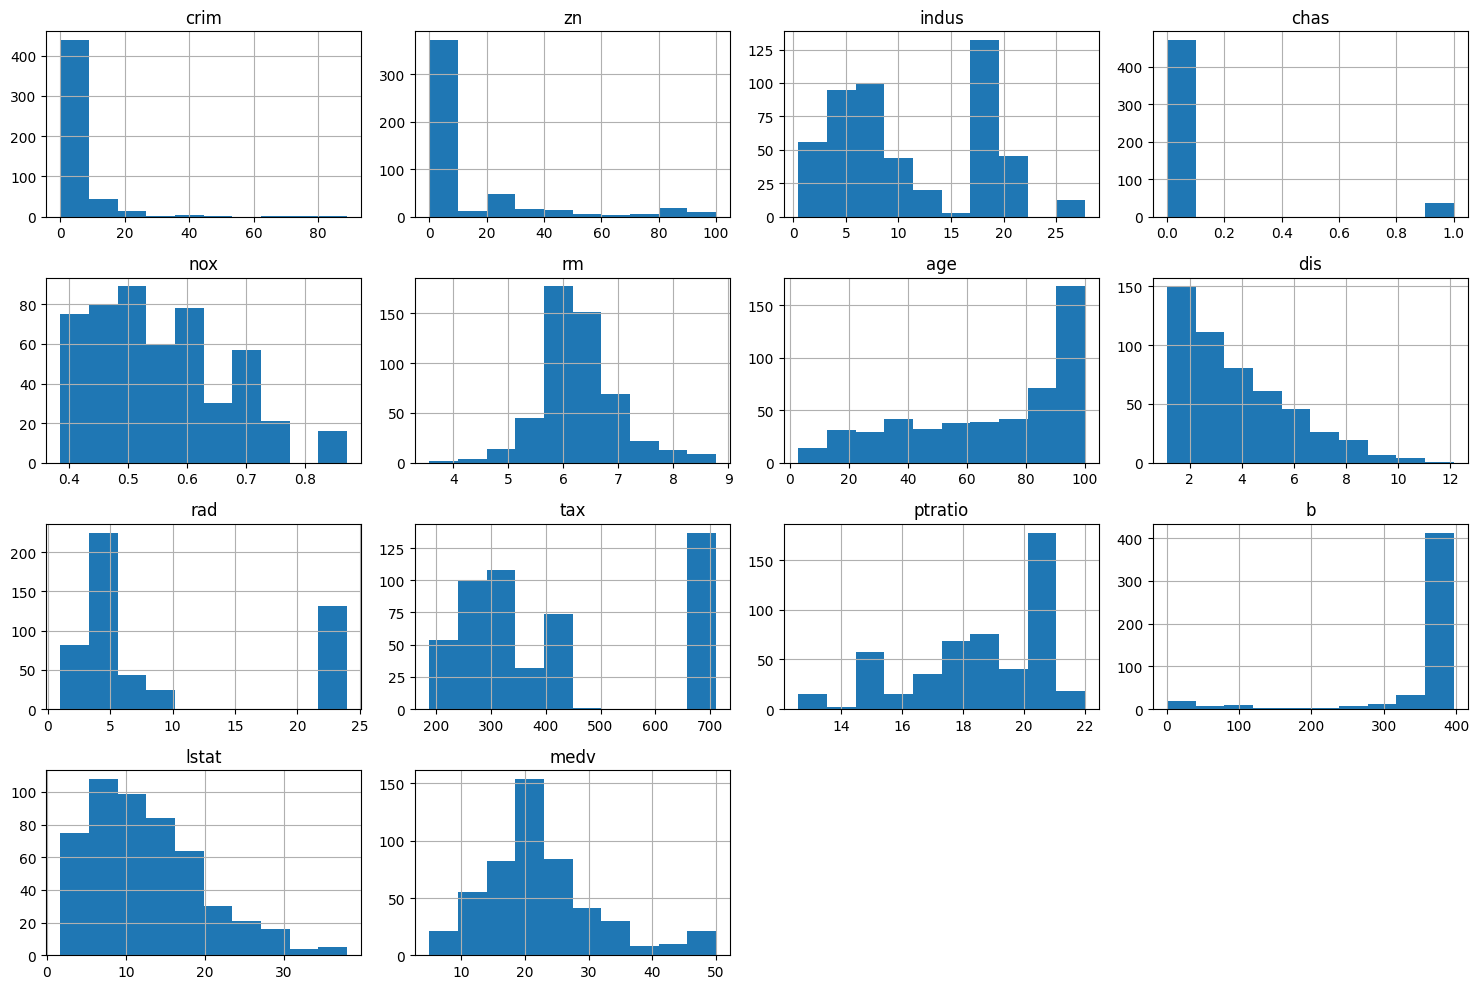

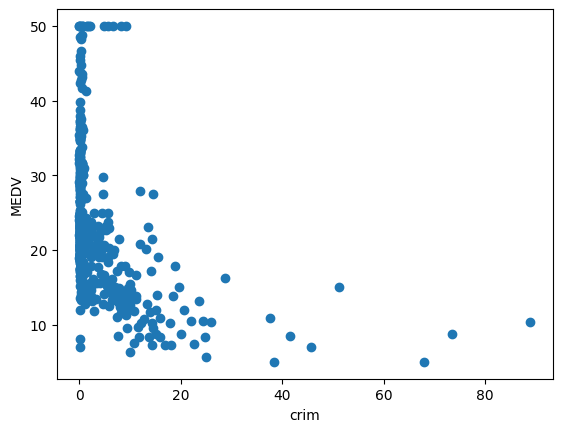

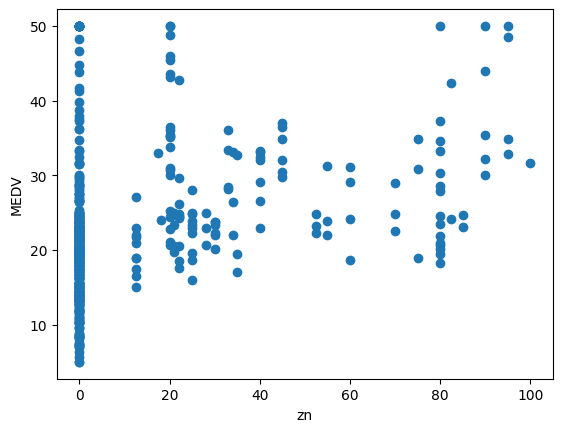

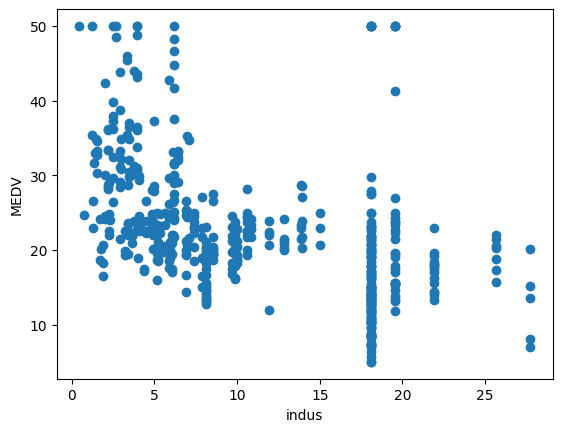

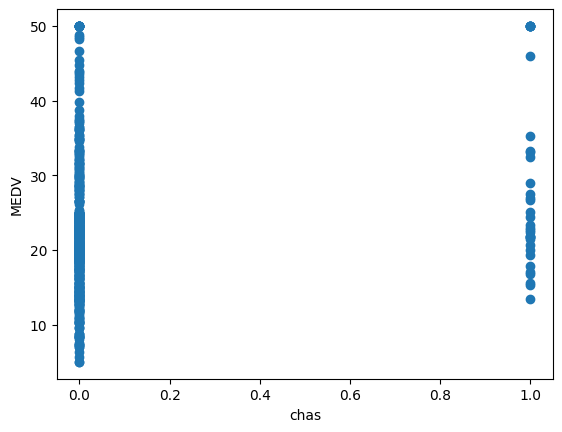

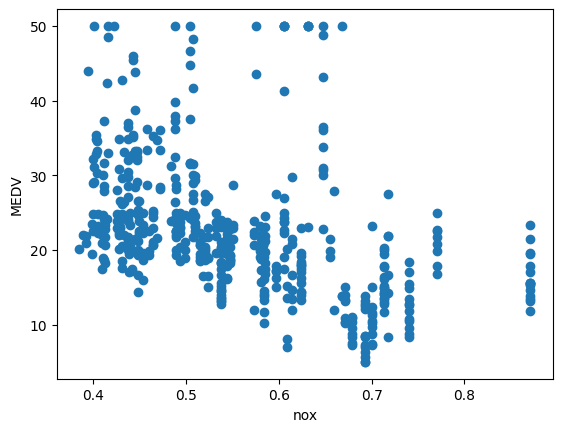

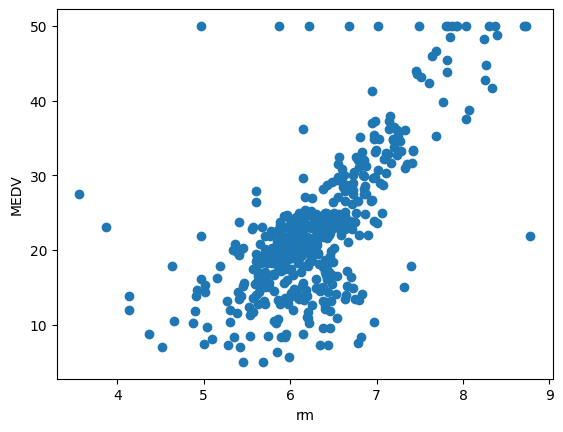

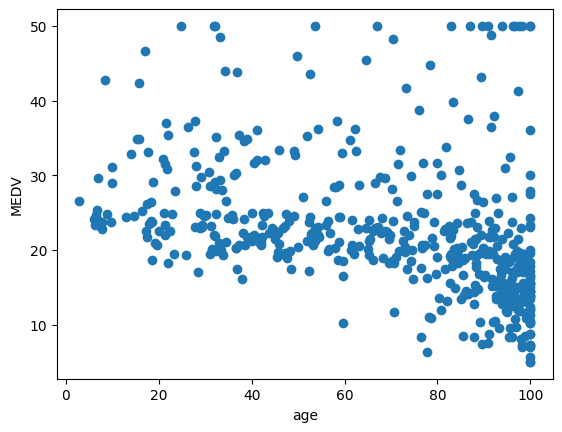

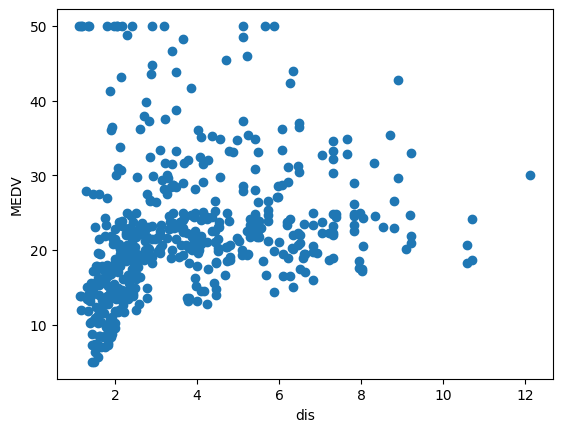

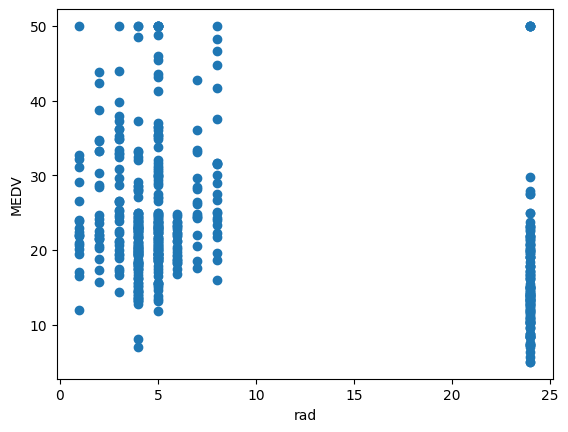

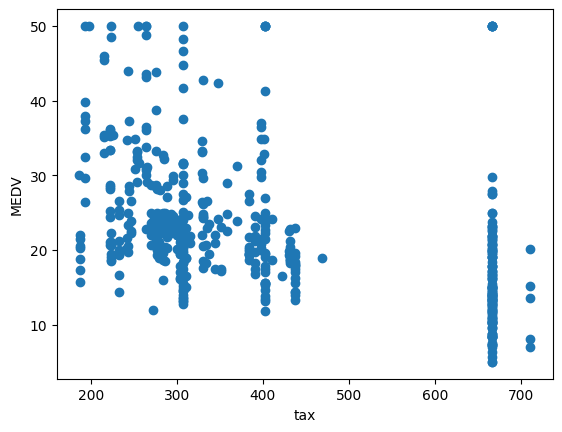

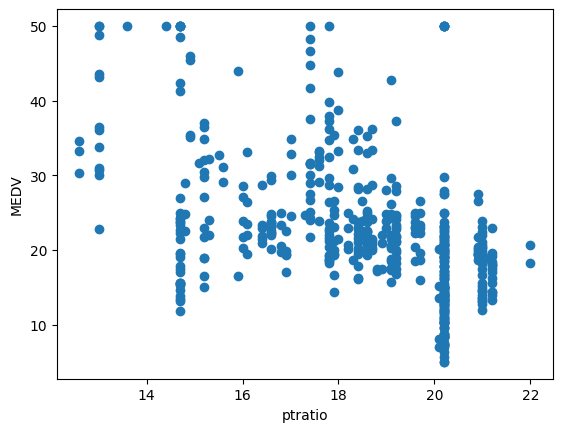

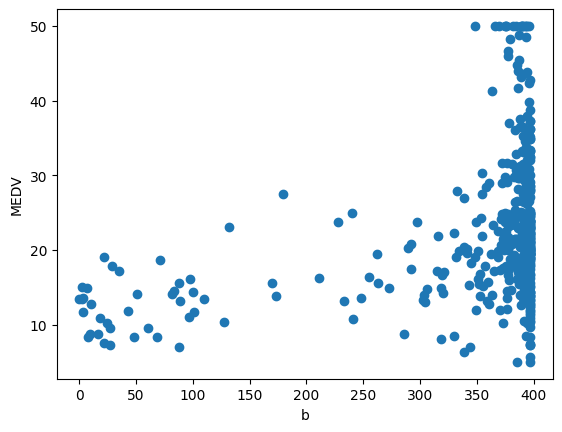

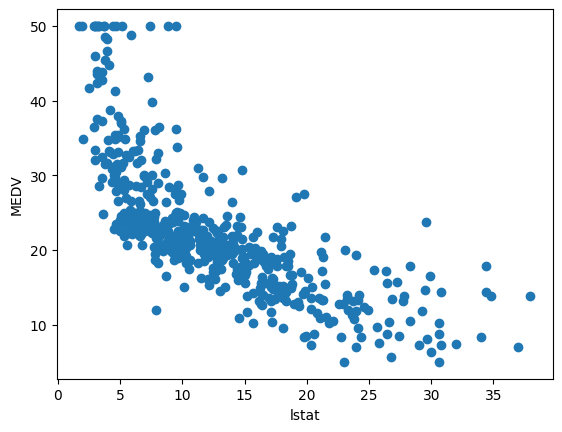

In [11]:
# Quick statistical summary
print(df.describe())

# First few rows of the DataFrame
print(df.head())

# Summary of the DataFrame
print(df.info())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each column
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Scatter plots comparing MEDV to other variables
for column in df.columns:
    if column != 'medv':
        plt.scatter(df[column], df['medv'])
        plt.xlabel(column)
        plt.ylabel('MEDV')
        plt.show()


In [12]:
# Identify and address any missing data
print(df.isnull().sum())

# Normalize continuous variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [15]:
# Creating a fake categorical variable based on 'AGE'
df['AGE_CATEGORY'] = pd.cut(df['age'], bins=[0, 35, 70, 100], labels=['new', 'old', 'very old'])

# One-hot encoding
age_dummies = pd.get_dummies(df['AGE_CATEGORY'], prefix='AGE')
df = pd.concat([df, age_dummies], axis=1)
df.drop('AGE_CATEGORY', axis=1, inplace=True)


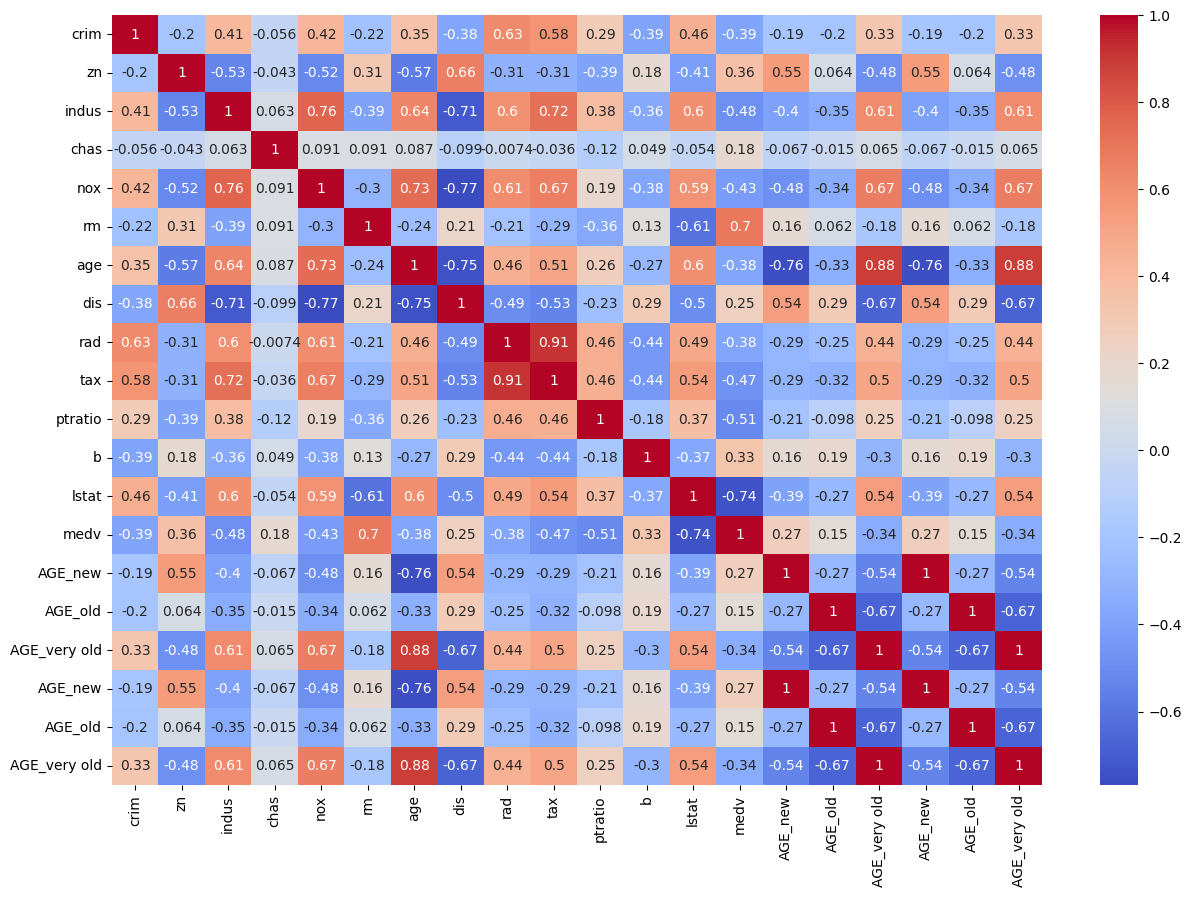

In [16]:
# Calculate correlations
correlations = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()


In [19]:
# Create a new feature by multiplying "RM" and "LSTAT"
df['RM_LSTAT'] = df['rm'] * df['lstat']


In [20]:
new_properties = df[df['age'] <= 35]
old_properties = df[(df['age'] > 35) & (df['age'] <= 70)]
very_old_properties = df[df['age'] > 70]


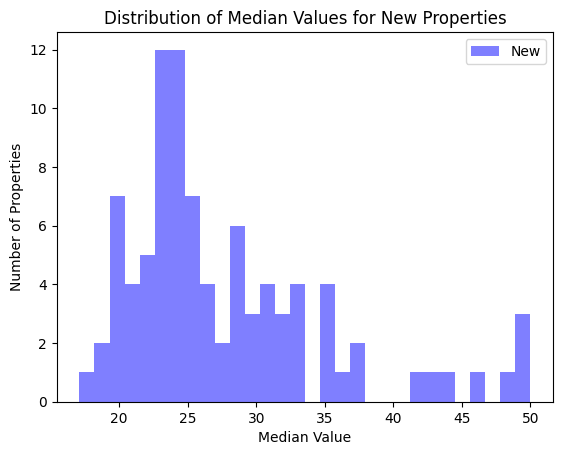

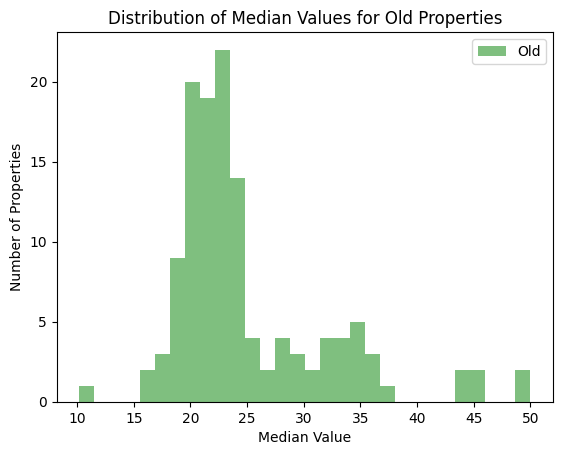

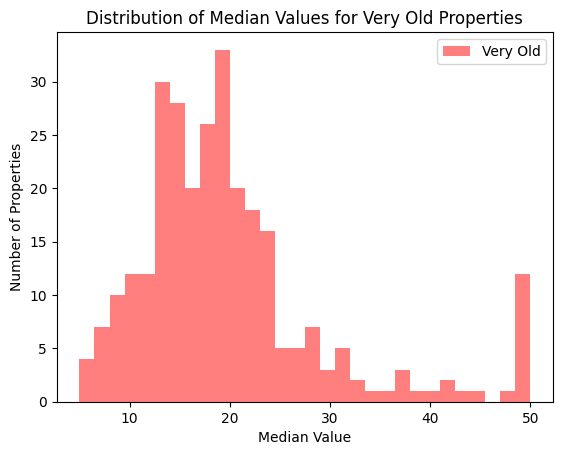

In [23]:
import matplotlib.pyplot as plt

# Histogram for New Properties
plt.hist(new_properties['medv'], bins=30, alpha=0.5, label='New', color='blue')
plt.xlabel('Median Value')
plt.ylabel('Number of Properties')
plt.title('Distribution of Median Values for New Properties')
plt.legend()
plt.show()

# Histogram for Old Properties
plt.hist(old_properties['medv'], bins=30, alpha=0.5, label='Old', color='green')
plt.xlabel('Median Value')
plt.ylabel('Number of Properties')
plt.title('Distribution of Median Values for Old Properties')
plt.legend()
plt.show()

# Histogram for Very Old Properties
plt.hist(very_old_properties['medv'], bins=30, alpha=0.5, label='Very Old', color='red')
plt.xlabel('Median Value')
plt.ylabel('Number of Properties')
plt.title('Distribution of Median Values for Very Old Properties')
plt.legend()
plt.show()


In [24]:

df['crim_bin'] = pd.cut(df['crim'], bins=[0, 1, 5, 10, 20, max(df['crim'])], labels=['0-1', '1-5', '5-10', '10-20', '20+'])
avg_MEDV_per_CRIM_BIN = df.groupby('crim_bin')['medv'].mean()
print(avg_medv_per_crim_bin)


NameError: name 'avg_medv_per_CRIM_BIN' is not defined